## **Matrix Transformations**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image 
import scipy
from skimage import data
from numpy import *

In [2]:
# Function to create square of side x
def plot_points(matrix, ls=':', lw=6):
    x_points, y_points = matrix
    size = len(x_points)
    colors = ['red', 'green', 'blue', 'black'] if not None else colors
    for i in range(size):
        plt.plot(x_points[i], y_points[i], color=colors[i], marker='*')
        plt.plot([x_points[i], x_points[(i+1) % size]], 
             [y_points[i], y_points[(i+1) % size]], 
             linestyle=ls, linewidth=lw)

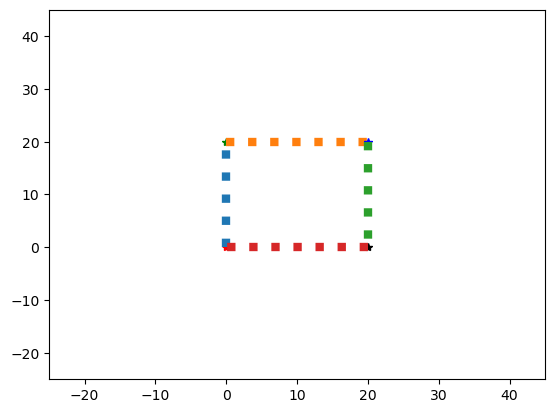

In [3]:
# Using above function to create a square of side 20
x_points = np.array([0, 0, 20, 20])
y_points = np.array([0, 20, 20, 0])
matrix = np.array([x_points, y_points])
colors = ['red', 'green', 'blue', 'black']
size = len(x_points)
plot_points(matrix)
plt.ylim([-25,45])
plt.xlim([-25,45])
#plt.axes().set_aspect('equal')
plt.show()

In [4]:
# Points generator
#def get_grid(x, y, homogenous=False):
#    coords = np.indices((x, y)).reshape(2, -1) 
#    return np.vstack((coords, np.ones(coords.shape[1]))) if homogenous else coords

x = np.array([0, 0, 20, 20])
y = np.array([0, 20, 20, 0])
matrix = np.array([x, y])
matrix
matrix_grid=np.vstack([matrix,[1, 1, 1, 1]])
print(matrix_grid)
#get_grid(x,y,homogenous=False)

[[ 0  0 20 20]
 [ 0 20 20  0]
 [ 1  1  1  1]]


In [5]:
# Define Transformations
def get_rotation(angle):
    angle = np.radians(angle)
    return np.array([

[np.cos(angle), -np.sin(angle), 0],
[np.sin(angle), np.cos(angle), 0],
[0, 0, 1]
])

get_rotation(90)

array([[ 6.123234e-17, -1.000000e+00,  0.000000e+00],
       [ 1.000000e+00,  6.123234e-17,  0.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  1.000000e+00]])

In [6]:
def get_translation(tx, ty):
    return np.array([
                        [1, 0, tx],  
                        [0, 1, ty], 
                        [0, 0, 1]
                    ])


In [7]:
def get_scale(s):
    return np.array([
        [s, 0, 0],
        [0, s, 0],
        [0, 0, 1]
])

R1 = get_rotation(45)
T1 = get_translation(20, 20)
S1 = get_scale(2)

In [8]:
print(R1)

[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


In [38]:
# Apply transformation x' = Ax
coords_rot = R1 @ matrix_grid    #Rotation Transformation
print(coords_rot)


[[ 0.00000000e+00 -1.41421356e+01 -4.44089210e-16  1.41421356e+01]
 [ 0.00000000e+00  1.41421356e+01  2.82842712e+01  1.41421356e+01]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00]]


In [39]:
matrix_grid

array([[ 0,  0, 20, 20],
       [ 0, 20, 20,  0],
       [ 1,  1,  1,  1]])

In [40]:
coords_trans = T1 @ matrix_grid  #Translation Transformation
coords_trans

array([[20, 20, 40, 40],
       [20, 40, 40, 20],
       [ 1,  1,  1,  1]])

In [41]:
coords_scale = S1 @ matrix_grid  #Scale Transformation
coords_scale

array([[ 0,  0, 40, 40],
       [ 0, 40, 40,  0],
       [ 1,  1,  1,  1]])

In [42]:
coords_composite1 = R1 @ T1 @ matrix_grid
coords_composite1

array([[-4.44089210e-16, -1.41421356e+01, -8.88178420e-16,
         1.41421356e+01],
       [ 2.82842712e+01,  4.24264069e+01,  5.65685425e+01,
         4.24264069e+01],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00]])

In [43]:
coords_composite2 = T1 @ R1 @ matrix_grid
coords_composite2

array([[20.        ,  5.85786438, 20.        , 34.14213562],
       [20.        , 34.14213562, 48.28427125, 34.14213562],
       [ 1.        ,  1.        ,  1.        ,  1.        ]])

In [44]:
coords_trans = T1 @ matrix_grid  #Translation Transformation
coords_scale = S1 @ matrix_grid  #Scale Transformation
coords_composite1 = R1 @ T1 @ matrix_grid
coords_composite2 = T1 @ R1 @ matrix_grid

## Rotation 

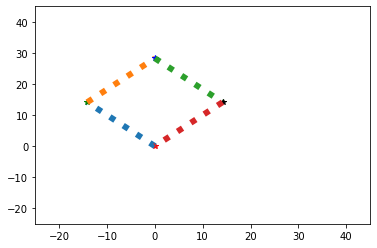

In [45]:
coords_rot_corrected = np.delete(coords_rot, 2, 0)
plot_points(coords_rot_corrected)
plt.ylim([-25,45])
plt.xlim([-25,45])
#plt.axes().set_aspect('equal')
plt.show()

## Translation

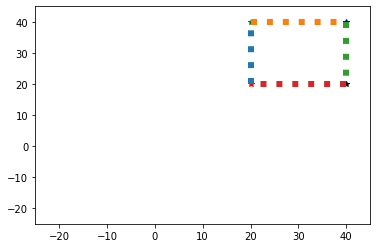

In [46]:
coords_trans_corrected = np.delete(coords_trans, 2, 0)
plot_points(coords_trans_corrected)
plt.ylim([-25,45])
plt.xlim([-25,45])
#plt.axes().set_aspect('equal')
plt.show()

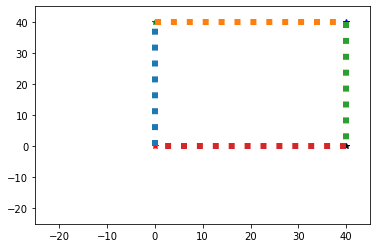

In [47]:
coords_rot_corrected = np.delete(coords_scale, 2, 0)
plot_points(coords_rot_corrected)
plt.ylim([-25,45])
plt.xlim([-25,45])
#plt.axes().set_aspect('equal')
plt.show()

## Matrix operations




### Determinant

In [86]:
# matrix determinant
from numpy import array
from numpy.linalg import det
# define matrix
A = array([
[8, 2, 1],
[4, 7, 6],
[5, 8, 4]])
print(A)

[[8 2 1]
 [4 7 6]
 [5 8 4]]


In [87]:
# calculate determinant
B = det(A)
print(B)

-135.00000000000003


In [92]:
# det(inv(A))=1/det(A)
print(det(inv(A)))
print(1/det(A))

-0.007407407407407413
-0.007407407407407406


### Rank

In [50]:
# vector rank
from numpy import array
from numpy.linalg import matrix_rank
# rank
v1 = array([1,2,3])
print(v1)
vr1 = matrix_rank(v1)
print('Rank = ',vr1)

[1 2 3]
Rank =  1


In [51]:
# zero rank vector
v2 = array([0,0,0,0,0])
print(v2)
vr2 = matrix_rank(v2)
print('Rank = ',vr2)

[0 0 0 0 0]
Rank =  0


In [52]:
# matrix rank
from numpy import array
from numpy.linalg import matrix_rank
# Matrix rank 0
M0 = array([
[0,0],
[0,0]])
print(M0)
mr0 = matrix_rank(M0)
print('Rank = ',mr0)
# Matrix rank 1 
M1 = array([
[1,2],
[1,2]])
print(M1)
mr1 = matrix_rank(M1)
print('Rank = ',mr1)

[[0 0]
 [0 0]]
Rank =  0
[[1 2]
 [1 2]]
Rank =  1


In [53]:
# Matrix rank 2
M2 = array([
[1,2],
[3,4]])
print(M2)
mr2 = matrix_rank(M2)
print('Rank = ',mr2)

[[1 2]
 [3 4]]
Rank =  2


### Matrix Inverse

In [54]:
from numpy.linalg import inv
import numpy as np

A = np.array([
[1, 2, 3],
[1, 5, 4],
[7, 1, 9]])

B = np.array([1, -1 , 1])
x=inv(A).dot(B.T)
#
x

array([-2.13043478, -1.30434783,  1.91304348])

In [55]:
print(inv(A))

[[-1.7826087   0.65217391  0.30434783]
 [-0.82608696  0.52173913  0.04347826]
 [ 1.47826087 -0.56521739 -0.13043478]]


In [56]:
print(A.dot(inv(A)))  

[[ 1.00000000e+00  1.11022302e-16  5.55111512e-17]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 4.44089210e-16 -1.11022302e-16  1.00000000e+00]]


## System of linear equations

Matrix Inverse

*Solve* Ax=b using 'solve'

In [57]:
from numpy.linalg import solve
x = solve(A,B.T)
print(x)

[-2.13043478 -1.30434783  1.91304348]


Solve the $$\begin{pmatrix}
1&2\\
3&4
\end{pmatrix} \begin{pmatrix}
x\\
y
\end{pmatrix} =\begin{pmatrix}
-1\\
1
\end{pmatrix}$$

$x=\frac{4\cdot -1-2\cdot 1}{1\cdot 4-2\cdot 3}=\frac{-6}{-2}=3$

$y=\frac{1\cdot 1-3\cdot -1}{1\cdot 4-2\cdot 3}=\frac{4}{-2}=-2$


In [58]:
from numpy import array
A=array([[1,2],[3,4]])
b=array([[-1,1]])
print(A)
print(b)

[[1 2]
 [3 4]]
[[-1  1]]


In [59]:
from numpy.linalg import inv
x=inv(A).dot(b.T)
print(x)

[[ 3.]
 [-2.]]


## Gram-Schmidt Process

- Given any set of vectors lets say U= $\{u_1,u_2,u_3\}$ 
- Goal: Convert U into set of orthonomal vectors V= $\{\textbf v_1,\textbf v_2,\textbf v_3\}$
- Such that $\textbf v_1.\textbf v_2 = \textbf v_1.\textbf v_3 = \textbf v_2.\textbf v_3 = 0 $ and $||\textbf v_1||=||\textbf v_2||=||\textbf v_3||=1$

- Sol:- We define the following $ w_1 = u_1 $ and $\textbf v_1 = \frac{w_1}{||w_1||} $

- $ w_2 = u_2 - proj_{\textbf v_1 }{(u_2)} = u_2 - (u_2.v_1).v_1 $ Hence $\textbf  v_2 = \frac{w_2}{||w_2||}$

- $ w_3 = u_3 - proj_{\textbf v_1 }{(u_3)}- proj_{\textbf v_2 }{(u_3)}$

- $ w_3 = u_3  - (u_3.v_1).v_1 - (u_3.v_2).v_2 $ Hence $\textbf  v_3 = \frac{w_3}{||w_3||}$


- In genreal $ w_k = u_k - \sum_{j = 1}^{k-1} proj_{\textbf v_j }{(u_k)} $

- Therefore $ v_k = \frac{w_k}{||w_k||}$
   

In [60]:
import numpy as np
A= np.array(((2,3,4),(3,4,5),(5,6,3)))

In [61]:
A

array([[2, 3, 4],
       [3, 4, 5],
       [5, 6, 3]])

In [62]:
u1,u2,u3=A[:,0],A[:,1],A[:,2] # Splitted the Matrix column wise

In [ ]:
w1 = u1

In [63]:
mag_w1=np.linalg.norm(w1) #Magnitude of u1

In [64]:
v1=w1/mag_w1 #Normalization

In [65]:
u2

array([3, 4, 6])

In [66]:
#check the magnitude of v1 is 1
v1.dot(v1)

1.0

In [67]:
w2=u2-(u2.dot(v1))*v1  #Removing the vector projection of u2 in v1 from u2

In [68]:
mag_w2=np.linalg.norm(w2) #Magnitude of w2

In [69]:
v2=w2/mag_w2 #normalizing

In [70]:
#check the magnitude of v2 is 1
v2.dot(v2)

1.0

In [71]:
#check if v1 and v2 are orthogonal
v1.dot(v2) 

-4.440892098500626e-16

In [72]:
w3=u3-(u3.dot(v1))*v1-(u3.dot(v2))*v2 # Removing the vector projection of u3 in v1 and v2 from u3

In [73]:
mag_w3=np.linalg.norm(w3) #Magnitude of w3

In [74]:
v3=w3/mag_w3 # Normalizing

In [75]:
v3.dot(v3)

1.0000000000000002

In [76]:
y=np.column_stack((v1,v2,v3))

In [77]:
y

array([[ 0.32444284,  0.78039897, -0.53452248],
       [ 0.48666426,  0.34684399,  0.80178373],
       [ 0.81110711, -0.52026598, -0.26726124]])

In [78]:
y.dot

<function ndarray.dot>

## Eigen Values and Vectors


In [5]:
import numpy as np
import scipy.linalg as la
T= np.array(((2,1),(1,1)))
eigvals, eigvecs=la.eig(T)
eigvals

array([2.61803399+0.j, 0.38196601+0.j])

In [80]:
eigvals

array([2.61803399+0.j, 0.38196601+0.j])

## Eigen basis and Transformations/ Diagonalization

#####  Matrix diagonalization is the process of performing a similarity transformation on a matrix in order to recover a similar matrix that is diagonal (i.e., all its non-diagonal entries are zero).

##### Once a matrix is diagonalized it becomes very easy to raise it to integer powers.

##### Not all matrices are diagonalizable. The diagonalizable matrices are those that have no defective eigenvalues (i.e., eigenvalues whose geometric multiplicity is less than their algebraic multiplicity).


## Similarity transformations
- Remember that two square matrices $A$ and $B$ are said to be similar if there exists an invertible 
-  $ k \times k $ Matrix   $ P $ such that $ B = P^{-1}AP $
- If two matrices are similar, then they have the same rank, trace, determinant and eigenvalues.
- Not only two similar matrices have the same eigenvalues, but their eigenvalues have the same algebraic and geometric multiplicities.


## Diagonalizable matrix
- We can now provide a definition of diagonalizable matrix.

- Definition Let A be a $ k \times k $ matrix. We say that A is diagonalizable if and only if it is similar to a diagonal matrix.

- In other words, when A is diagonalizable, then there exists an invertible matrix $P$ such that
  $ D = P^{-1}AP $
  
  
- Consider the matrix 
$ A = \bigl(\begin{smallmatrix}
 -1 & 2 \\ 
 0 &  3
\end{smallmatrix}\bigr)$

In [7]:
A = np.array([[-1,2],[0,3]])
print(A)

[[-1  2]
 [ 0  3]]


- Can we find P such that $ D = P^{-1}AP $ and $D$ is diagonal Matrix
- $P$ is a matrix of Eigen vectors of $A$ and $D$ is a matrix of eigen values of $A$

In [8]:
# Eigen Values of A 
eigvals, eigvecs=la.eig(A)
eigvals

array([-1.+0.j,  3.+0.j])

In [9]:
# Lets Create D out of eigenavlues of A
D = np.array(((1,0),(0,1)))*eigvals
D

array([[-1.+0.j,  0.+0.j],
       [-0.+0.j,  3.+0.j]])

In [11]:

P=eigvecs

P

array([[1.        , 0.4472136 ],
       [0.        , 0.89442719]])

In [13]:
inv_P=np.linalg.inv(P)
inv_P

array([[ 1.        , -0.5       ],
       [ 0.        ,  1.11803399]])

Now consider $ P^{-1}AP$

In [16]:
inv_P@A@P

array([[-1.,  0.],
       [ 0.,  3.]])

In [17]:
D==inv_P@A@P  # Shows that D = P^{-1}AP

array([[ True,  True],
       [ True,  True]])

### Most Important Application
- We can find power of any given matrix
- $ D = P^{-1}AP $  hence 
- $ A = PDP^{-1}$
- $ A^{n}$ = $\underbrace{P^{-1}DP\times P^{-1}DP \times...\times P^{-1}DP}_{n-times} $
- $ A^{n} = P^{-1}D^{n}P$

### In the above problem 
$ A^{2}= P^{-1}D^2P $


In [37]:
D_sq=D@D
D_sq

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 9.+0.j]])

In [38]:
A_sq=A@A
A_sq

array([[1, 4],
       [0, 9]])

In [33]:
inv_P

array([[ 1.        , -0.5       ],
       [ 0.        ,  1.11803399]])

In [34]:
P

array([[1.        , 0.4472136 ],
       [0.        , 0.89442719]])

In [39]:
final=inv_P@D_sq@P
final

array([[ 1.        +0.j, -3.57770876+0.j],
       [ 0.        +0.j,  9.        +0.j]])

In [36]:
A_sq == final

array([[ True, False],
       [ True,  True]])